# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis with pandas. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [7]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create two new dataframes
north_df = pd.read_csv(r"NorthCallCenter.csv")
south_df = pd.read_csv(r"SouthCallCenter.csv")

pd.set_option('display.max_columns', 200) #changing view to see all columns

display(north_df.head(10))
display(south_df.head(10))

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
5,5,North,Product Support,2:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,2,1
6,6,North,Product Support,2:00 PM,Incoming,A,Joe,NO,0,0,8,1,1.0,3,1
7,7,North,Product Support,2:00 PM,Incoming,B,Lilly,NO,0,0,11,2,1.0,3,1
8,8,North,Product Support,3:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,4,1
9,9,North,Product Support,3:00 PM,Incoming,A,Cam,NO,0,0,11,3,1.0,4,1


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
5,5,South,Sales Support,1:00 PM,Incoming,D,Karl,NO,0,0,9,1,1.0,4,1
6,6,South,Product Support,11:00 AM,Incoming,C,Sandy,NO,0,0,8,1,1.0,2,1
7,7,South,Product Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,1,1.0,3,1
8,8,South,Product Support,2:00 PM,Incoming,D,Randy,NO,0,0,11,2,1.0,4,1
9,9,South,Product Support,3:00 PM,Incoming,D,George,NO,0,0,8,3,1.0,4,1


## Task 1: Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. Use the code blocks below to begin cleaning your data. At the end of the section, record your answers.

#### EDA Question 1A:  How many reps are in the North branch?  

In [8]:
# EDA Question 1A solution below:
north_branch_reps = north_df['Rep ID'].value_counts()
print(north_branch_reps)

nb_reps = len(pd.unique(north_df['Rep ID']))
print ()
print ("Number of Reps in North Branch :", 
        nb_reps)

Rep ID
Brent     37
Lilly     30
Todd      29
Duke      29
Joe       26
Cam       24
Xander    24
Amanda    23
Andy      23
Name: count, dtype: int64

Number of Reps in North Branch : 9


#### EDA Question 1B:  How many reps are in the South branch?  

In [9]:
# EDA Question 1B solution Below:
south_branch_reps = south_df['Rep ID'].value_counts()
print(south_branch_reps)

sb_reps = len(pd.unique(south_df['Rep ID']))
print()
print ("Number of Reps in South Branch :", 
        sb_reps)

Rep ID
Eric      35
Randy     33
Sandy     32
Helga     31
Kate      29
George    29
Karl      28
Susan     26
Josh      26
Sharon    25
Alice     20
Name: count, dtype: int64

Number of Reps in South Branch : 11


#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [10]:
# EDA Question 2A solution Below:
avg_busy_mins_NDF = north_df['Busy Minutes'].mean().round(2)
print("Average busy minutes for North Branch :",
        avg_busy_mins_NDF)

avg_ntrdy_mins_NDF = north_df['Not Ready Minutes'].mean().round(2)
print("Average not ready minutes for North Branch :",
        avg_ntrdy_mins_NDF)

incoming_wt_time_NDF = north_df['Incoming Wait Time'].mean().round(2)
print("Average incoming wait time for North Branch :",
        incoming_wt_time_NDF)

during_call_wt_time_NDF = north_df['During Call Wait Time'].mean().round(2)
print("Average during call wait time for North Branch :",
        during_call_wt_time_NDF)

Average busy minutes for North Branch : 9.99
Average not ready minutes for North Branch : 1.91
Average incoming wait time for North Branch : 3.05
Average during call wait time for North Branch : 2.97


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [11]:
# EDA Question 2B solution Below:
avg_busy_mins_SDF = south_df['Busy Minutes'].mean().round(2)
print("Average busy minutes for South Branch :",
        avg_busy_mins_SDF)

avg_ntrdy_mins_SDF = south_df['Not Ready Minutes'].mean().round(2)
print("Average not ready minutes for South Branch :",
        avg_ntrdy_mins_SDF)

incoming_wt_time_SDF = south_df['Incoming Wait Time'].mean().round(2)
print("Average incoming wait time for South Branch :",
        incoming_wt_time_SDF)

during_call_wt_time_SDF = south_df['During Call Wait Time'].mean().round(2)
print("Average during call wait time for South Branch :",
        during_call_wt_time_SDF)

Average busy minutes for South Branch : 10.05
Average not ready minutes for South Branch : 1.91
Average incoming wait time for South Branch : 3.0
Average during call wait time for South Branch : 3.08


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [12]:
# EDA Question 3 solution Below:
ttl_calls_pertimeblock = pd.concat([north_df, south_df]).groupby(['Time Block']).sum().reset_index()
print(ttl_calls_pertimeblock.loc[:, ['Time Block', 'Calls']])

  Time Block  Calls
0   10:00 AM     99
1   11:00 AM     56
2   12:00 PM    120
3    1:00 PM     40
4    2:00 PM     65
5    3:00 PM     73
6    4:00 PM     53
7    5:00 PM     43
8    9:00 AM     10


##### Record your answers for the EDA section below:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.0
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



Additional EDA

## Task 2: Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

In [13]:
display(north_df.isna().sum())
display(south_df.isna().sum())
#"Incoming Wait Time" values are missing from both dfs
# going to look further into NaN values and if they are associated with "incoming" or "outgoing" calls, or both
incomingNA_north = north_df[(north_df['Incoming Wait Time'].isna()) & (north_df['Incoming or Outgoing'] == 'Incoming')]
incomingNA_north

incomingNA_south = south_df[(south_df['Incoming Wait Time'].isna()) & (south_df['Incoming or Outgoing'] == 'Incoming')]
incomingNA_south

outgoingNA_south = south_df[(south_df['Incoming Wait Time'].isna()) & (south_df['Incoming or Outgoing'] == 'Outgoing')]
outgoingNA_south

outgoingNA_north = north_df[(north_df['Incoming Wait Time'].isna()) & (north_df['Incoming or Outgoing'] == 'Outgoing')]
outgoingNA_north

# ******Decided not to go trhough with the below code ****
# # I am going to insert a new column to designate which rows had missing values for "Incoming Wait Time" and which did not for future reference. 
# def get_incoming_wait_time_nan(incoming_wait_time):
#     if pd.isna(incoming_wait_time):
#         return 1
#     else:
#         return 0

# north_df['Incoming Wait Time NaN'] = north_df['Incoming Wait Time'].apply(get_incoming_wait_time_nan)
# col = north_df.pop('Incoming Wait Time NaN')
# north_df.insert(13, 'Incoming Wait Time NaN', col)

# display(north_df)

# south_df['Incoming Wait Time NaN'] = south_df['Incoming Wait Time'].apply(get_incoming_wait_time_nan)

# col = south_df.pop('Incoming Wait Time NaN')
# south_df.insert(13, 'Incoming Wait Time NaN', col)

# display(south_df)

# # option to repalce NaN - I am choosing to replace all NaN values as all outgoing calls will have no incoming wait time. 
# north_df['Incoming Wait Time'] = north_df['Incoming Wait Time'].replace(np.nan, 0)
# display(north_df)
# south_df['Incoming Wait Time'] = south_df['Incoming Wait Time'].replace(np.nan, 0)
# display(south_df)



Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       163
During Call Wait Time      0
Calls                      0
dtype: int64

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       188
During Call Wait Time      0
Calls                      0
dtype: int64

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
82,82,North,Sales Support,10:00 AM,Outgoing,A,Cam,NO,1,0,8,1,NaN,2,1
83,83,North,Sales Support,10:00 AM,Outgoing,B,Duke,NO,1,0,10,2,NaN,4,1
84,84,North,Sales Support,11:00 AM,Outgoing,B,Xander,NO,1,0,10,1,NaN,4,1
85,85,North,Product Support,9:00 AM,Outgoing,B,Duke,NO,1,0,12,1,NaN,2,1
86,86,North,Sales Support,10:00 AM,Outgoing,B,Lilly,YES,0,1,9,3,NaN,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3,1
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NaN,2,1
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2,1
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2,1


#### Record your answer below:

> Your Answer: 
Searched for null values in each dataset. 
# display(north_df.isna().sum())
# display(south_df.isna().sum())

I found "Incoming Wait Time" column in both dfs had missing values. Next, I looked into if the NaN values were associated with Incoming or Outgoing calls, or both.
# incomingNA_north = north_df[(north_df['Incoming Wait Time'].isna()) & (north_df['Incoming or Outgoing'] == 'Incoming')]
# incomingNA_north

# incomingNA_south = south_df[(south_df['Incoming Wait Time'].isna()) & (south_df['Incoming or Outgoing'] == 'Incoming')]
# incomingNA_south

# outgoingNA_south = south_df[(south_df['Incoming Wait Time'].isna()) & (south_df['Incoming or Outgoing'] == 'Outgoing')]
# outgoingNA_south

# outgoingNA_north = north_df[(north_df['Incoming Wait Time'].isna()) & (north_df['Incoming or Outgoing'] == 'Outgoing')]
# outgoingNA_north

In my above code, you can see I first inserted a new column to mark where the original NaN values in each dataframe were present. I also thought about inserting a 0 for all NaN values. However, I realized this started to throw off some of my calculations, therefore, I decided to leave these NaN values as I believe this most accurately reflects the data - outgoing calls cannot have a "incoming wait time" and should not be included in any calculations. 


#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

In [14]:
north_df['Sale'].sort_values() 
north_df_yes = (north_df.loc[19, 'Sale'])
north_df['Sale'] = north_df['Sale'].replace(north_df_yes, 'YES')
north_df


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3,1
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NaN,2,1
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2,1
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2,1


##### Record your answer by below:
> Your Answer: 

First, I sorted the values within the nort_df "Sale" column to view the different "YES" values.
# north_df['Sale'].sort_values() 

The above code me showed on "YES" value had a trailing space. Next, I created a variable for the "YES " value I wanted to replace.
# north_df_yes = (north_df.loc[19, 'Sale'])

I replaced the variable with the correct "YES" value.
# north_df['Sale'] = north_df['Sale'].replace(north_df_yes, 'YES')


#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?

In [15]:
# Cleaning Question 3 solution below: REVIEW
northdf_duplicates = north_df.duplicated(keep=False)
display(north_df[northdf_duplicates])

southdf_duplicates = south_df.duplicated(keep=False)
display(south_df[southdf_duplicates])



,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


##### Record your answer below:
> Your Answer: 
I created a variable for each df to view any duplicate rows used .duplicated.

# northdf_duplicates = north_df.duplicated(keep=False)
# display(north_df[northdf_duplicates])

# southdf_duplicates = south_df.duplicated(keep=False)
# display(south_df[southdf_duplicates])

Next, I noted the indexes of the duplicate rows in each df, and used .drop to remove them from each dataset. 

# north_df = north_df.drop([50, 105])
# south_df = south_df.drop([58, 170, 180])


#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [16]:
# Cleaning Question 4 solution below:

display(south_df['Unnamed: 0'].value_counts())
display(north_df['Unnamed: 0'].value_counts())

display(north_df.head())
display(south_df.head())

north_df.columns

north_df = north_df[['Branch', 'Call Purpose', 'Time Block',
       'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call',
       'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
       'During Call Wait Time', 'Calls']]
north_df

south_df = south_df[['Branch', 'Call Purpose', 'Time Block',
       'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call',
       'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
       'During Call Wait Time', 'Calls']]
south_df

Unnamed: 0
0      1
206    1
213    1
212    1
211    1
      ..
104    1
103    1
102    1
101    1
313    1
Name: count, Length: 314, dtype: int64

Unnamed: 0
0      1
154    1
156    1
157    1
158    1
      ..
86     1
87     1
88     1
89     1
244    1
Name: count, Length: 245, dtype: int64

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


##### Record your answer below:
> Your Answer: 
Earlier in my EDA process, I used the unique function, and value counts to look into each column in each dataframe. I decided the "unnamed:0" column could be removed from each df as each row is indexed, which serves the same purpose as the "unnamed:0" column. 

# display(north_df.nunique())
# display(south_df.nunique())

# display(south_df['Unnamed: 0'].value_counts())
# display(north_df['Unnamed: 0'].value_counts())

I displayed all columns for each dataset, pasted the columns into the dfs and removed the "Unnamed:0" columns from each df.
# north_df = north_df[['Branch', 'Call Purpose', 'Time Block',
#        'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call',
#        'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
#        'During Call Wait Time', 'Calls']]
# north_df

# south_df = south_df[['Branch', 'Call Purpose', 'Time Block',
#        'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call',
#        'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
#        'During Call Wait Time', 'Calls']]
# south_df


## Task 3: Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer below.

In [17]:
# Create dataframe for the entire company named df
df = pd.concat([north_df, south_df]).reset_index(drop=True)
df

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
555,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
556,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
557,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [18]:
# Manipulation Question solution below:
calls_per_rep = df.groupby("Rep ID")[['Branch','Lost Call','Abandoned','Busy Minutes','Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time', 'Calls']].sum()
rep_calls_sorted = calls_per_rep.sort_values(by='Calls', ascending=False)
rep_calls_sorted

,Branch,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,,,,,,,,
Brent,NorthNorthNorthNorthNorthNorthNorthNorthNorthN...,0,1,362,71,17.0,117,37
Eric,SouthSouthSouthSouthSouthSouthSouthSouthSouthS...,0,0,361,54,47.0,112,35
Randy,SouthSouthSouthSouthSouthSouthSouthSouthSouthS...,3,1,320,66,47.0,98,33
Sandy,SouthSouthSouthSouthSouthSouthSouthSouthSouthS...,1,0,325,60,34.0,100,32
Helga,SouthSouthSouthSouthSouthSouthSouthSouthSouthS...,0,2,292,58,36.0,95,31
Lilly,NorthNorthNorthNorthNorthNorthNorthNorthNorthN...,0,2,307,59,37.0,88,30
Todd,NorthNorthNorthNorthNorthNorthNorthNorthNorthN...,1,0,296,58,21.0,97,29
Duke,NorthNorthNorthNorthNorthNorthNorthNorthNorthN...,2,0,292,56,39.0,85,29
George,SouthSouthSouthSouthSouthSouthSouthSouthSouthS...,0,0,298,53,41.0,87,29


##### Record your answer below
Rep with the hightest number of calls and their total calls:
- North Branch = Brent, 37 calls
- South Branch = Eric, 35 calls

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [19]:
# Manipulation Question 2 solution below:
abandonment_rate_bybranch = df.groupby('Branch')['Abandoned'].mean().map('{:.2%}'.format)
display(abandonment_rate_bybranch)

abandonment_rate_avg = '{:.2%}'.format(df['Abandoned'].mean())
display(abandonment_rate_avg)


Branch
North    2.86%
South    1.27%
Name: Abandoned, dtype: object

'1.97%'

##### Record your answer below:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86%
- South Branch = 1.27%
- Company Wide = 1.97%
- Do any of these fall out of the optimal range of 2-5%?
Technically, the South Branch and Company Wide average call adandonment rates fall below the optimal range, as they are under 2%. 

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [32]:
# Manipulation Question 3 solution below: *****

total_incoming_calls = df.groupby(['Branch', 'Incoming or Outgoing'])['Calls'].sum()
display(total_incoming_calls)

calls_2sec_bybranch = df[df['Incoming Wait Time'] <= 2]

Calls_answered_in_2 = calls_2sec_bybranch.groupby('Branch')['Calls'].sum()
display(Calls_answered_in_2)

percentage_calls = (Calls_answered_in_2 / total_incoming_calls) * 100
display(percentage_calls)

cw_incoming_calls = df.groupby('Incoming or Outgoing')['Calls'].sum()
display(cw_incoming_calls)

calls_answered_2_ttl = df[df['Incoming Wait Time'] <= 2]['Calls'].sum()
display(calls_answered_2_ttl)

CW_percentage_calls = (calls_answered_2_ttl / cw_incoming_calls) * 100
display(CW_percentage_calls)


Branch  Incoming or Outgoing
North   Incoming                 82
        Outgoing                163
South   Incoming                126
        Outgoing                188
Name: Calls, dtype: int64

Branch
North    33
South    48
Name: Calls, dtype: int64

Branch  Incoming or Outgoing
North   Incoming                40.243902
        Outgoing                20.245399
South   Incoming                38.095238
        Outgoing                25.531915
Name: Calls, dtype: float64

Incoming or Outgoing
Incoming    208
Outgoing    351
Name: Calls, dtype: int64

np.int64(81)

Incoming or Outgoing
Incoming    38.942308
Outgoing    23.076923
Name: Calls, dtype: float64

##### Record your answer below:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.24% and 33 calls
- South Branch = 38.10% and 48 calls
- Company Wide = 38.94% and 81 calls

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

In [61]:
# Manipulation Question 4 solution below:
avg_speed_ofanswer_by_branch = df.groupby('Branch')['Incoming Wait Time'].mean().round(2)
display(avg_speed_ofanswer_by_branch)

avg_speed_ofanswer = df['Incoming Wait Time'].mean().round(2)
display(avg_speed_ofanswer)


Branch
North    3.05
South    3.00
Name: Incoming Wait Time, dtype: float64

np.float64(3.02)

##### Record your answer by below:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05
- South Branch in seconds = 3
- Company Wide in seconds = 3.02 

## Task 4: Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?

/var/folders/x0/fdc1ntkx3cz66f_5cc2x1lf00000gn/T/ipykernel_1240/370069672.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i]


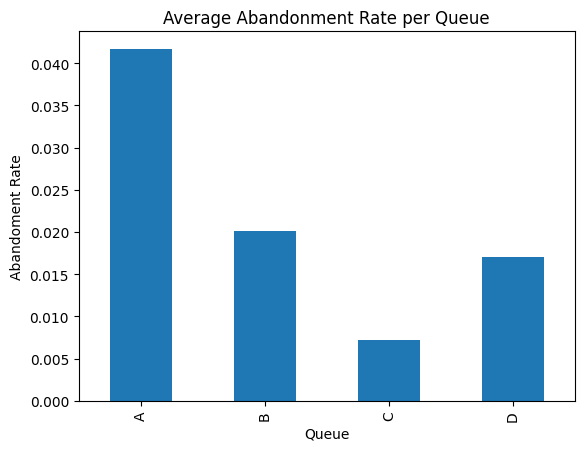

In [62]:
# Create visualization 1 here
# Import any additional libraries needed with alias

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

#Your code below:
abandoment_rates_plt = pd.Series(abandonment_rates)
abandoment_rates_plt.plot(kind = 'bar', title = 'Average Abandonment Rate per Queue', xlabel = 'Queue', ylabel = 'Abandoment Rate')
plt.show()

##### Record your answer below:

> Chart style you chose and why: I chose to use a bar chart because we are comparing categories of data. The bar chart effectively shows us how the average abandonment rate compares by queue.

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?

/var/folders/x0/fdc1ntkx3cz66f_5cc2x1lf00000gn/T/ipykernel_1240/4103401282.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=service_level, x='Rep ID', y='Service Level %', estimator=sum, errorbar=None, palette='deep6')


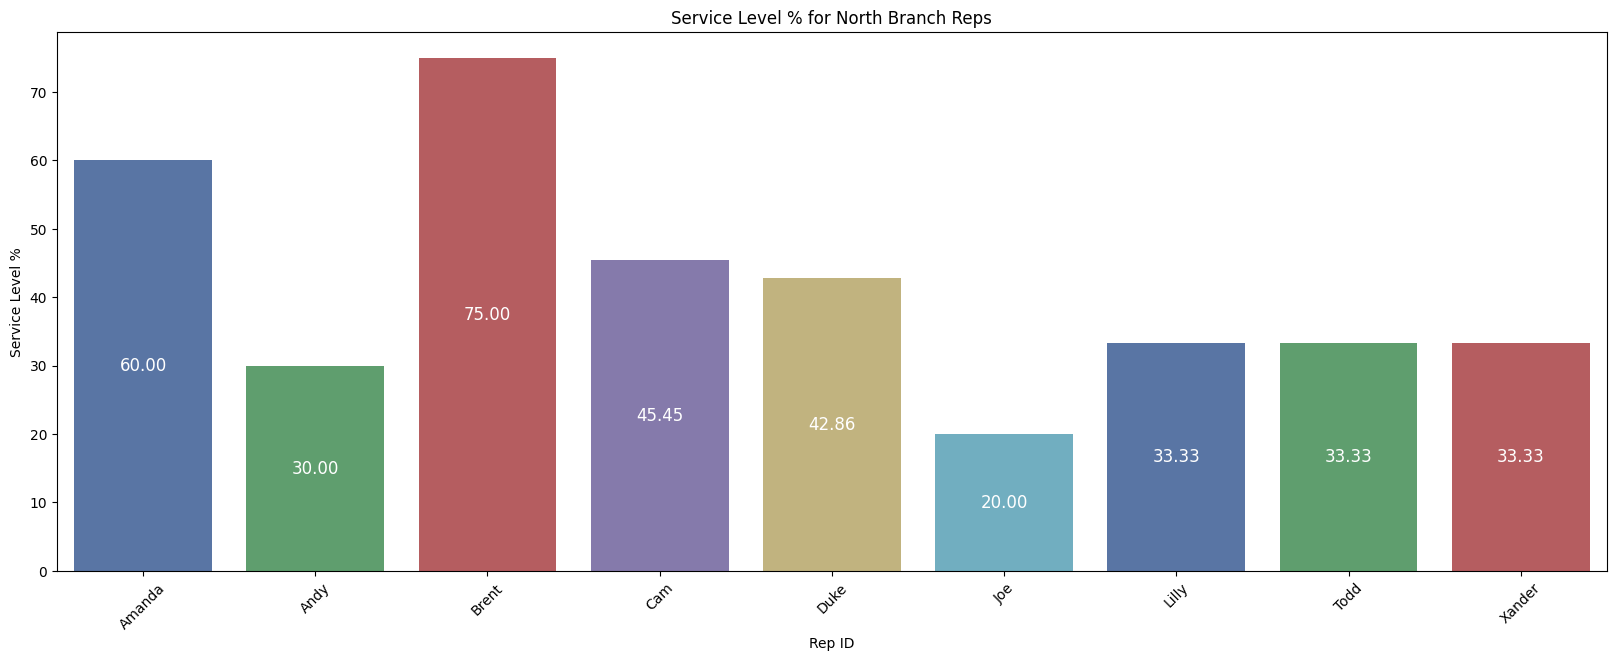

/var/folders/x0/fdc1ntkx3cz66f_5cc2x1lf00000gn/T/ipykernel_1240/4103401282.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp2 = sns.barplot(data=service_level2, x='Rep ID', y='Service Level %', estimator=sum, errorbar=None, palette='deep6')


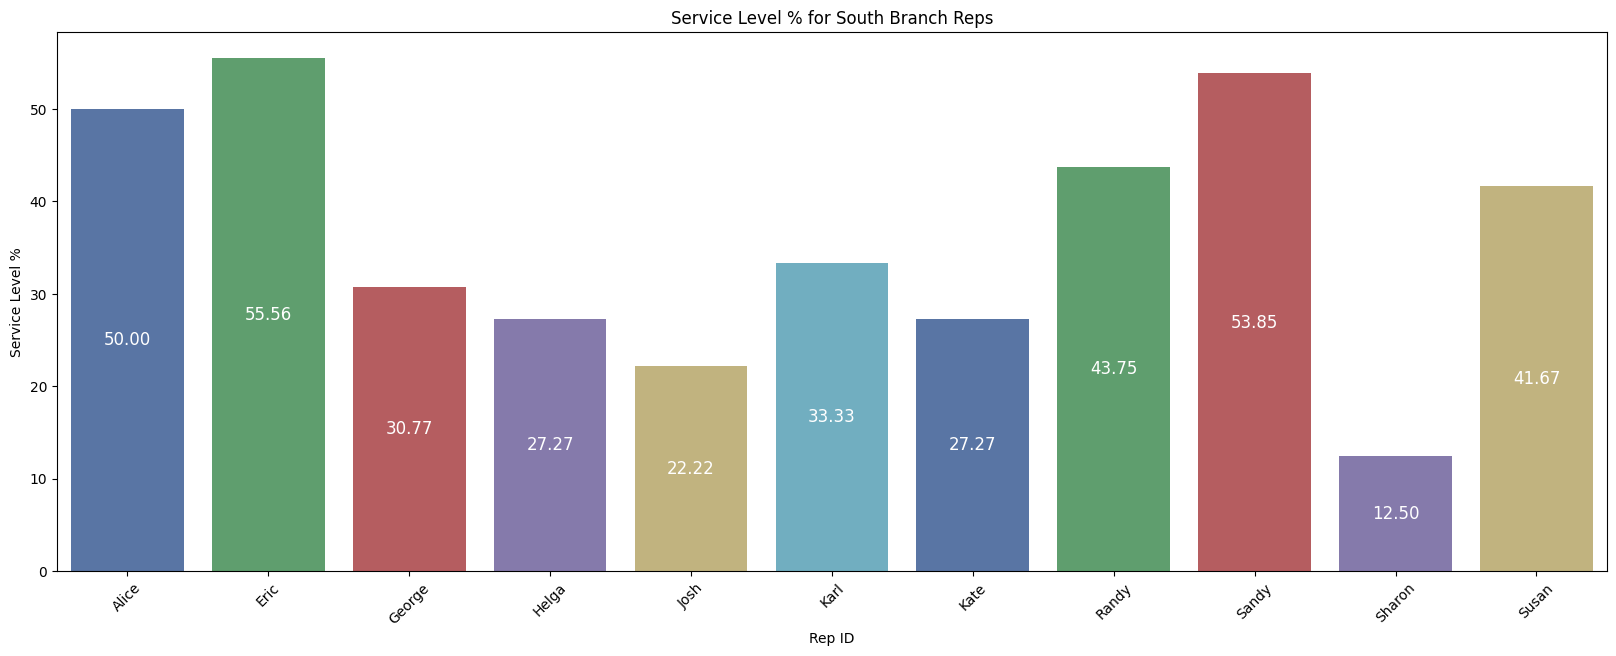

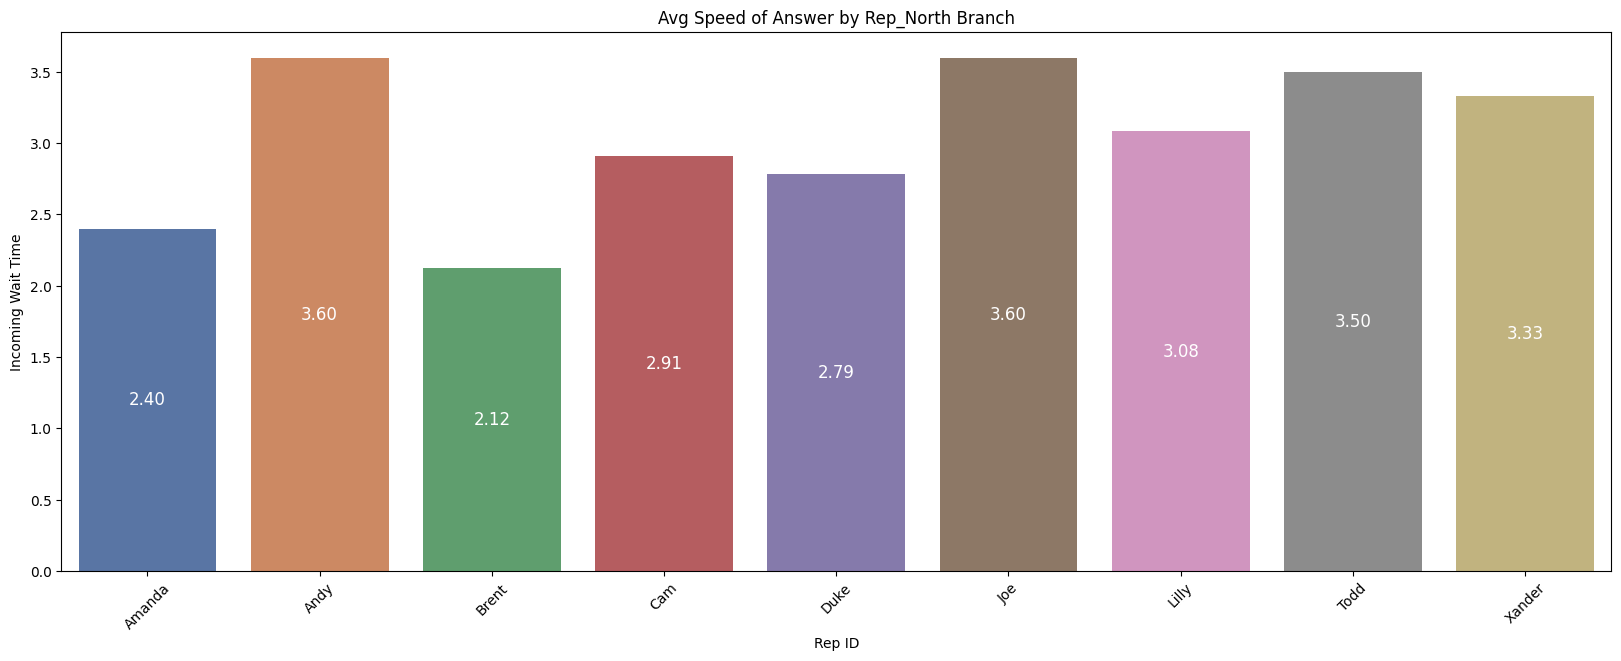

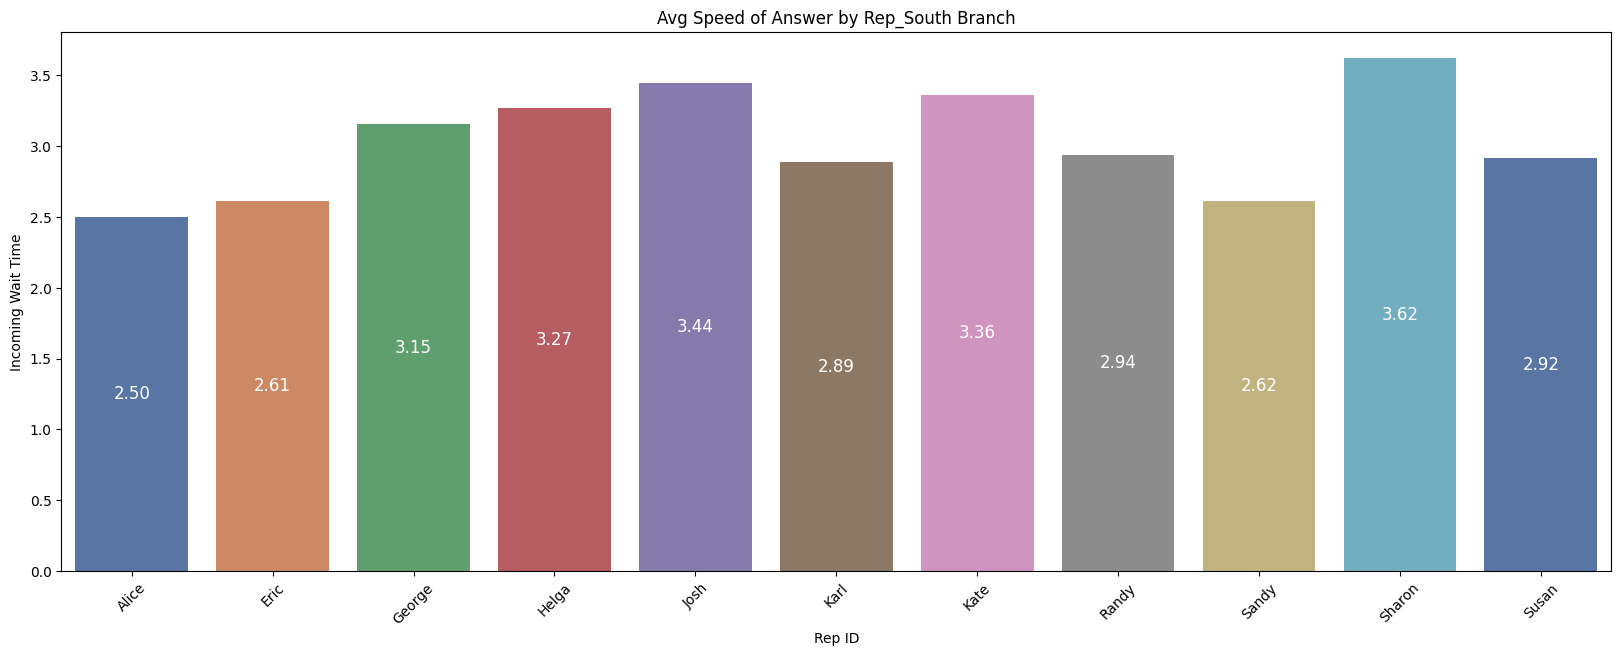

In [80]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

south_plt = south_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# display(north_plt)

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[(north_df["Incoming Wait Time"] >= 1.0) & (north_df["Incoming Wait Time"] <= 2.0)]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table
# display(quick_stats)

quick_calls2 = south_df[(south_df["Incoming Wait Time"] >= 1.0) & (south_df["Incoming Wait Time"] <= 2.0)]
quick_reps2 = quick_calls2[["Rep ID", "Calls"]]
quick_stats2 = quick_reps2.groupby(["Rep ID"]).sum()  # Final Table
# display(quick_stats2)

# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  
# display(total_stats)
quick_stats = quick_stats.reset_index()
total_stats = total_stats.reset_index()

total_calls_in2 = south_df[south_df["Incoming or Outgoing"] == "Incoming"]
rep_calls2 = total_calls_in2[["Rep ID", "Calls"]]     
total_stats2 = rep_calls2.groupby(["Rep ID"]).sum() # Final Table  
# display(total_stats2)
#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

service_level2 = pd.merge(quick_stats2, total_stats2, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100
service_level2["Service Level %"] = service_level2["Calls_x"]/service_level2["Calls_y"] * 100

# display(service_level)

#Your Code Here:
plt.figure(figsize=(20, 7))
bar_plot = sns.barplot(data=service_level, x='Rep ID', y='Service Level %', estimator=sum, errorbar=None, palette='deep6')
plt.title('Service Level % for North Branch Reps')
plt.xlabel('Rep ID')
plt.ylabel('Service Level %')
plt.xticks(rotation=45)

for bar in bar_plot.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        height / 2,  
        f'{height:.2f}',  
        ha='center',  
        va='center',  
        color='white',  
        fontsize=12  
    )
plt.show()

plt.figure(figsize=(20, 7))
bp2 = sns.barplot(data=service_level2, x='Rep ID', y='Service Level %', estimator=sum, errorbar=None, palette='deep6')
plt.title('Service Level % for South Branch Reps')
plt.xlabel('Rep ID')
plt.ylabel('Service Level %')
plt.xticks(rotation=45)

for bar in bp2.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        height / 2,  
        f'{height:.2f}',  
        ha='center',  
        va='center',  
        color='white',  
        fontsize=12  
    )
plt.show()

plt.figure(figsize=(20, 7))
bp3 = sns.barplot(data=north_plt, x='Rep ID', y='Incoming Wait Time', hue='Rep ID', estimator='mean', errorbar=None, palette='deep', dodge=False, legend=False)
plt.title('Avg Speed of Answer by Rep_North Branch')
plt.xlabel('Rep ID')
plt.ylabel('Incoming Wait Time')
plt.xticks(rotation=45)

for bar in bp3.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        height / 2,  
        f'{height:.2f}',  
        ha='center',  
        va='center',  
        color='white',  
        fontsize=12  
    )
plt.show()

plt.figure(figsize=(20, 7))
bp4 = sns.barplot(data=south_plt, x='Rep ID', y='Incoming Wait Time', hue='Rep ID', estimator='mean', errorbar=None, palette='deep', dodge=False, legend=False)
plt.title('Avg Speed of Answer by Rep_South Branch')
plt.xlabel('Rep ID')
plt.ylabel('Incoming Wait Time')
plt.xticks(rotation=45)

for bar in bp4.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        height / 2,  
        f'{height:.2f}',  
        ha='center',  
        va='center',  
        color='white',  
        fontsize=12  
    )
plt.show()

##### Record your answer below:

> Chart style you chose and why: I chose to use bar charts again becuase this is a clear way to see categorical data. I added in the specific Reps avg speed of answers and service level % for easier viewing. 

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?

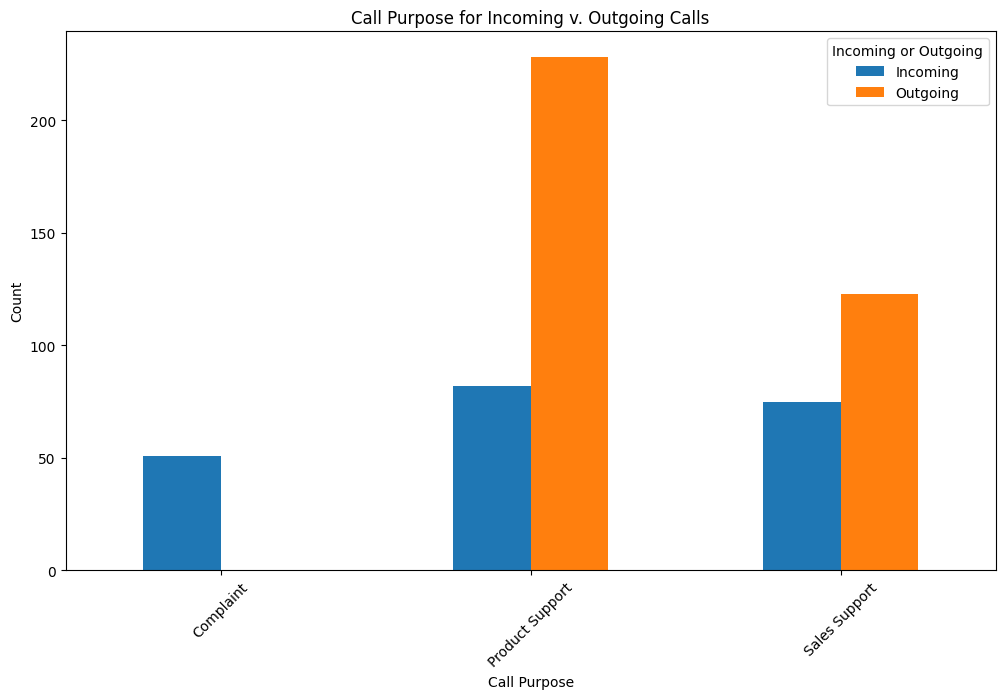

In [106]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:

purpose_counts_plt = pd.Series(purpose_counts)
purpose_counts_plt

purpose_counts_df = purpose_counts_plt.to_frame()
purpose_counts_df = purpose_counts_df.reset_index()
purpose_counts_df


df_pivot = purpose_counts_df.pivot_table(index='Call Purpose', columns='Incoming or Outgoing', values='count', aggfunc='sum')

df_pivot.plot(kind='bar', figsize=(12, 7))

plt.xlabel('Call Purpose')
plt.ylabel('Count')
plt.title('Call Purpose for Incoming v. Outgoing Calls')   

plt.xticks(rotation=45)
plt.show()



##### Record your answer below:

> Chart style you chose and why: I decided to use a grouped bar chart to best display what type of call each incoming or outgoing call is. this allows us to visulaize multiple categories in one chart. 

## Task 5: Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer below:
> Your Answer: 
Looking at the average abandoment rate, this is higher for queues associated with the North Branch, compared to queues associated with the South branch. This tells us customers are dropping more calls when they are queued with the North Branch due to a long wait time until a Rep is available. Looking at service level %, this has a more even spread looking at the south branch compared to the north branch. Based on this data, the south branch appreas to be operating more efficiently.



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer below:
> Your Answer: 
The average answer speeds of the two branches are very close. However, as addressed in the question above, looking at the service level % and abandonment rates, this leads me to suggest the North branch would benefit from more reps. 


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer below:
> Your Answer: 
I was pleasantly surprised with how clean this dataset was and was pleased with the data available. More day into how the outgoing calls play a role in their days, and how they are assigned to the Reps queues would be helpful to have a better understnading of the call center.  


## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer below:

> Chart style you chose and why: 

In [4]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot:

NameError: name 'df' is not defined